# Intel Image Classification

### 1. Imports and Setup

In [31]:
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


### 2. Dataset Paths

In [32]:


TRAIN_DIR = "/Users/mahvishayub/Documents/intel-image-classification/data/seg_train/seg_train"
TEST_DIR  = "/Users/mahvishayub/Documents/intel-image-classification/data/seg_test/seg_test"

print("Training class folders:", os.listdir(TRAIN_DIR))
print("Testing class folders:", os.listdir(TEST_DIR))





Training class folders: ['forest', 'buildings', '.DS_Store', 'glacier', 'street', 'mountain', 'sea']
Testing class folders: ['forest', 'buildings', 'glacier', 'street', 'mountain', 'sea']


In [33]:
print(os.listdir(TRAIN_DIR))


['forest', 'buildings', '.DS_Store', 'glacier', 'street', 'mountain', 'sea']


### 3. Image Loading and Preprocessing

In [34]:
IMG_SIZE = 64

def load_images_from_folder(folder_path):
    X, y = [], []
    
    # Only class directories (ignore .DS_Store)
    class_names = sorted([
        d for d in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, d))
    ])
    
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img.flatten())
            y.append(label)
    
    return np.array(X), np.array(y), class_names





### 4. Load Training and Testing Data

In [35]:
X_train, y_train, class_names = load_images_from_folder(TRAIN_DIR)
X_test, y_test, _ = load_images_from_folder(TEST_DIR)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Classes:", class_names)



Training data shape: (14034, 4096)
Testing data shape: (3000, 4096)
Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


### 5. Decision Tree 

In [36]:
# Initialize Decision Tree (baseline model)
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_dt = dt_model.predict(X_test)

print("Step 5 complete: Decision Tree training successful.")



Step 5 complete: Decision Tree training successful.


### 6. Decision Tree Evaluation

In [ ]:

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=class_names))


Decision Tree Accuracy: 0.353

Confusion Matrix:
[[122  53  62  62  70  68]
 [ 62 202  34  47  38  91]
 [ 81  40 185  79 118  50]
 [ 49  32  86 232  86  40]
 [ 63  38 118 104 141  46]
 [ 69  86  56  60  53 177]]

Classification Report:
              precision    recall  f1-score   support

   buildings       0.27      0.28      0.28       437
      forest       0.45      0.43      0.44       474
     glacier       0.34      0.33      0.34       553
    mountain       0.40      0.44      0.42       525
         sea       0.28      0.28      0.28       510
      street       0.38      0.35      0.36       501

    accuracy                           0.35      3000
   macro avg       0.35      0.35      0.35      3000
weighted avg       0.35      0.35      0.35      3000



### 7. Random Forest Model Training

In [ ]:


rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest training completed.")


Random Forest training completed.


### 8. Random Forest Evaluation

In [28]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=class_names))


Random Forest Accuracy: 0.5256666666666666

Confusion Matrix:
[[157  66  59  48  39  68]
 [ 24 347  20  10  12  61]
 [ 38  34 299  90  69  23]
 [ 34  31  63 319  64  14]
 [ 39  53 129  91 181  17]
 [ 53  90  52  22  10 274]]

Classification Report:
              precision    recall  f1-score   support

   buildings       0.46      0.36      0.40       437
      forest       0.56      0.73      0.63       474
     glacier       0.48      0.54      0.51       553
    mountain       0.55      0.61      0.58       525
         sea       0.48      0.35      0.41       510
      street       0.60      0.55      0.57       501

    accuracy                           0.53      3000
   macro avg       0.52      0.52      0.52      3000
weighted avg       0.52      0.53      0.52      3000



### 9. Hyperparameter Experiment (n_estimators)

In [37]:
n_estimators_range = [10, 50, 100, 200]
rf_accuracies = []

for n in n_estimators_range:
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    preds = rf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    rf_accuracies.append(acc)
    
    print(f"n_estimators={n}, Accuracy={acc:.4f}")


n_estimators=10, Accuracy=0.4337
n_estimators=50, Accuracy=0.5097
n_estimators=100, Accuracy=0.5257
n_estimators=200, Accuracy=0.5320


### 10. Hyperparameter Visualization

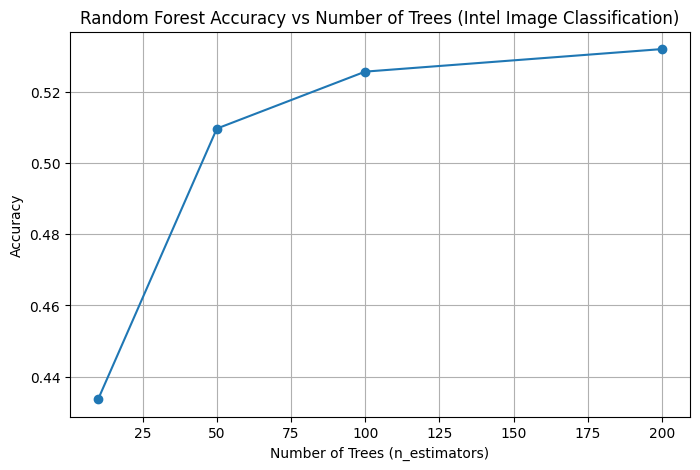

In [39]:


plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, rf_accuracies, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees (Intel Image Classification)")
plt.grid(True)
plt.show()


### 11. Results and Discussion


##### The Random Forest classifier outperformed the Decision Tree model on the Intel

##### Image Classification dataset. Increasing the number of trees improved accuracy up to a point, after which the gains became marginal.

##### This highlights the advantage of ensemble methods over single decision trees for image classification tasks. A limitation of this approach is the use of flattened grayscale images instead of deep learning–based feature extraction.